## Loading and Preprocessing data: 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd 


With above piece of code all the required libraries were imported for dataset loading and preprocessing.

In [3]:
# loading dateset
(x_train, y_train),(x_test,y_test) = cifar10.load_data() 

In [5]:
# Checking loaded data 
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)
      

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [6]:
# This piece of code shows a random images and labels for given set of inputs 

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return
    

In this dataset, total 10 classes are presents whose labels are taken as an array. This categoical classes are maped with numeric label in the dataset. labels array is going tobe useful for mapping y labels with there classes.

In [7]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

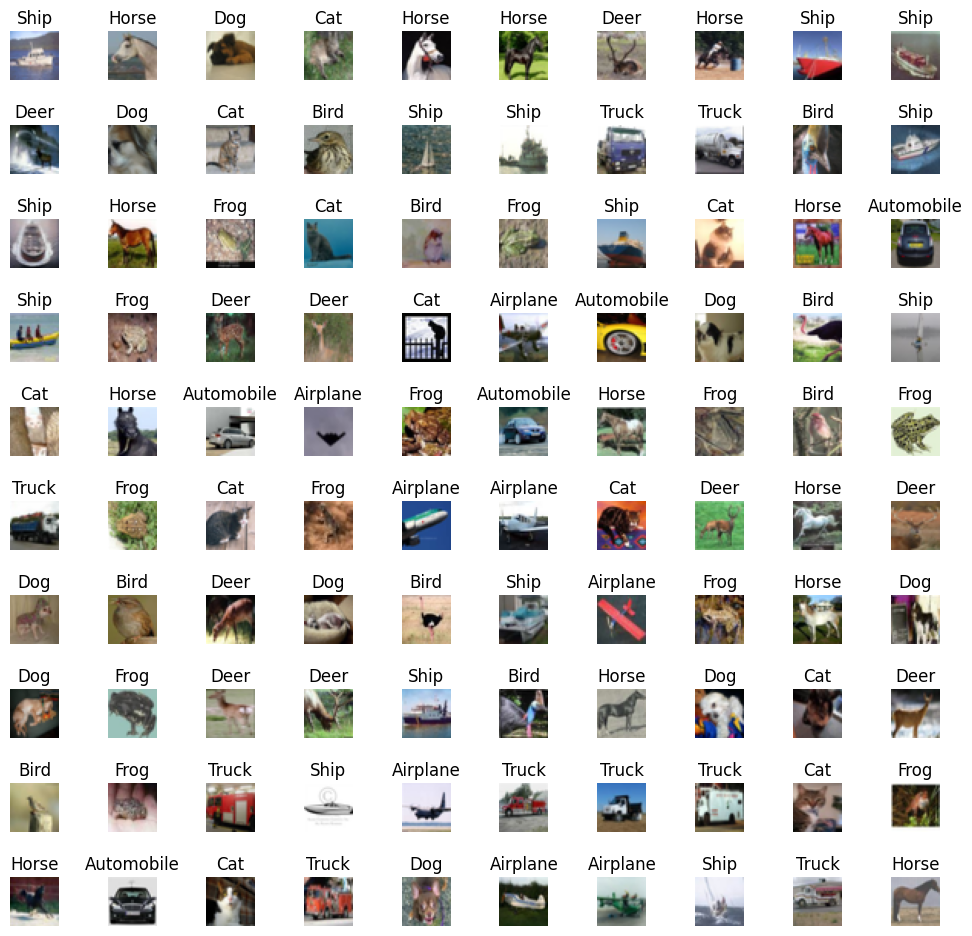

In [8]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)


#### Preprocessing data:
Now we have to prepare the data for fiting into the convoultional neural network. First step is to convert the data's data type to float32 and second have to normailize it by dividing pixel value of 255. later,implement one hot encoding to y labels to get a (m, class) array. m - is number of images 

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255


In [12]:
#keras.utils.to_cotegorical(y, num_of_classes) convert the label 
#data into (m, num_of class) array from (m, 1) input 
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [13]:
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


Above figure gives the details of the architecure we are building here. Input image is of (32 x 32 x 3) and output is a (1,10) array for single image. Network consts of two blocks of 2 conv_layers followed by maxPool_layer, and dropout_layer. After, that ouput is flattened out and passed through dropout layer followed by fully connected layer with sigmoid activation. Relu activation is used in all convlayers except in the last output layer. let's began the coding with importing libraries required.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [15]:
#Building model computational graph
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))


In [16]:
#Description about parameters and layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

### Training The Model



In [18]:
#compiling model with loss, opt, metrics
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [20]:

#reduce epoch value if u r very impatient
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 100, validation_split = 0.2)


Epoch 1/5
625/625 [==============================] - 43s 69ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 2/5
625/625 [==============================] - 42s 67ms/step - loss: 2.3028 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 3/5
625/625 [==============================] - 42s 67ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/5
625/625 [==============================] - 42s 68ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/5
625/625 [==============================] - 42s 67ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0952


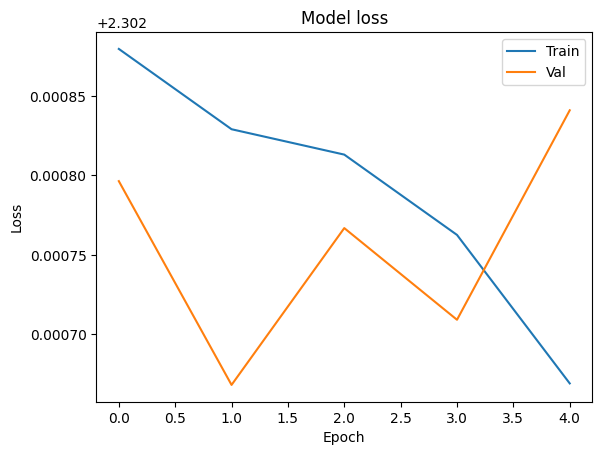

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


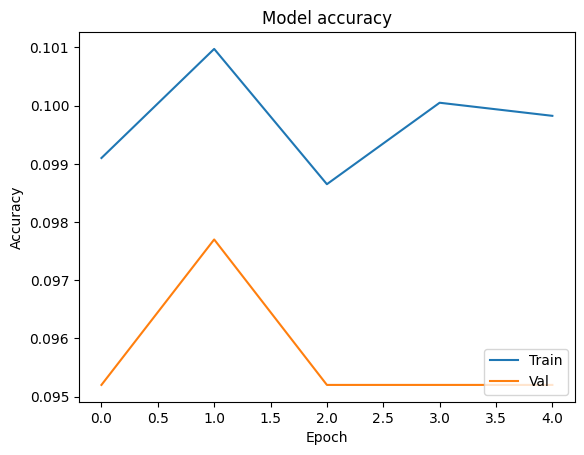

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [23]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 3s 8ms/step - loss: 2.3026 - accuracy: 0.1000


0.10000000149011612